array([[<Axes: xlabel='G3', ylabel='G3'>,
        <Axes: xlabel='Medu', ylabel='G3'>,
        <Axes: xlabel='Fedu', ylabel='G3'>,
        <Axes: xlabel='studytime', ylabel='G3'>,
        <Axes: xlabel='failures', ylabel='G3'>,
        <Axes: xlabel='Dalc', ylabel='G3'>,
        <Axes: xlabel='Walc', ylabel='G3'>],
       [<Axes: xlabel='G3', ylabel='Medu'>,
        <Axes: xlabel='Medu', ylabel='Medu'>,
        <Axes: xlabel='Fedu', ylabel='Medu'>,
        <Axes: xlabel='studytime', ylabel='Medu'>,
        <Axes: xlabel='failures', ylabel='Medu'>,
        <Axes: xlabel='Dalc', ylabel='Medu'>,
        <Axes: xlabel='Walc', ylabel='Medu'>],
       [<Axes: xlabel='G3', ylabel='Fedu'>,
        <Axes: xlabel='Medu', ylabel='Fedu'>,
        <Axes: xlabel='Fedu', ylabel='Fedu'>,
        <Axes: xlabel='studytime', ylabel='Fedu'>,
        <Axes: xlabel='failures', ylabel='Fedu'>,
        <Axes: xlabel='Dalc', ylabel='Fedu'>,
        <Axes: xlabel='Walc', ylabel='Fedu'>],
       [<Axes: xlabel='G

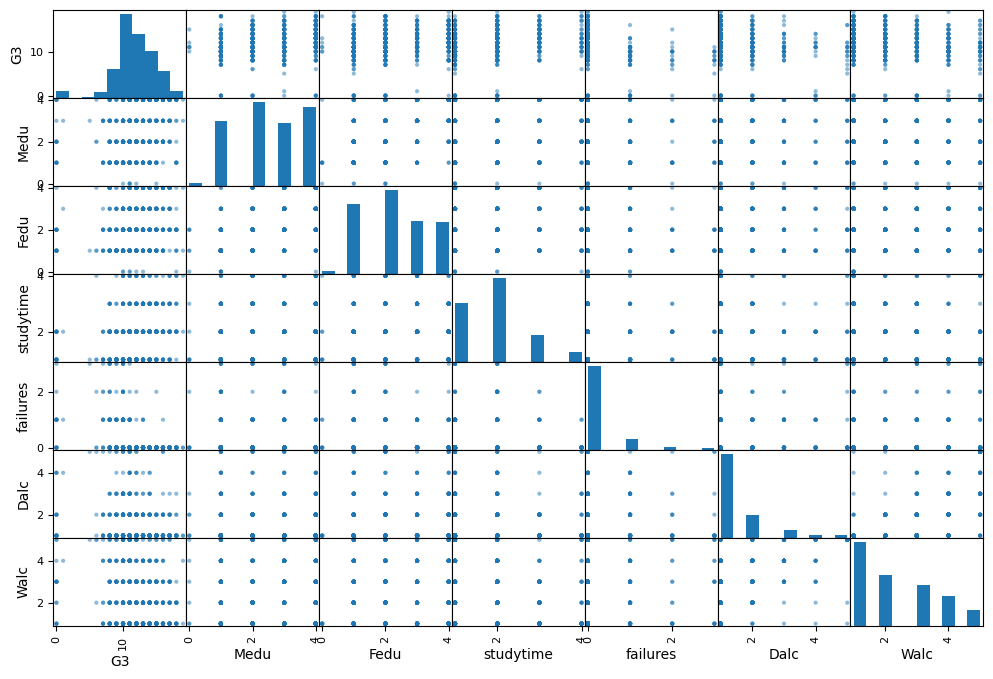

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('student/student-por.csv', sep=';')

attributes = ['G3', 'Medu', 'Fedu', 'studytime', 'failures', 'Dalc', 'Walc']
pd.plotting.scatter_matrix(df[attributes], figsize=(12, 8))

C:\Users\matei\AppData\Local\Temp\ipykernel_10396\1071644075.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

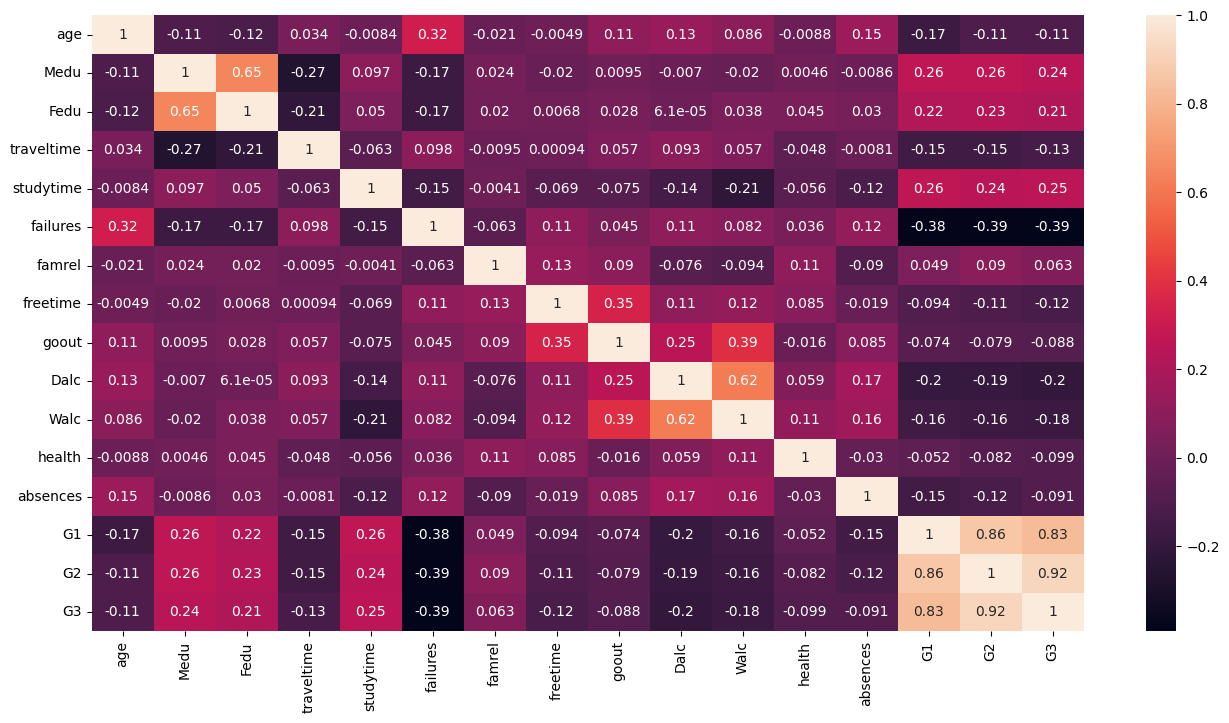

In [30]:
corr_matrix = df.corr()
corr_matrix['G3'].sort_values(ascending=False)

plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True)


array([[<Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'failures'}>],
       [<Axes: title={'center': 'Dalc'}>,
        <Axes: title={'center': 'Walc'}>,
        <Axes: title={'center': 'traveltime'}>],
       [<Axes: title={'center': 'freetime'}>,
        <Axes: title={'center': 'Medu'}>,
        <Axes: title={'center': 'Fedu'}>],
       [<Axes: title={'center': 'G1'}>, <Axes: title={'center': 'G2'}>,
        <Axes: title={'center': 'G3'}>]], dtype=object)

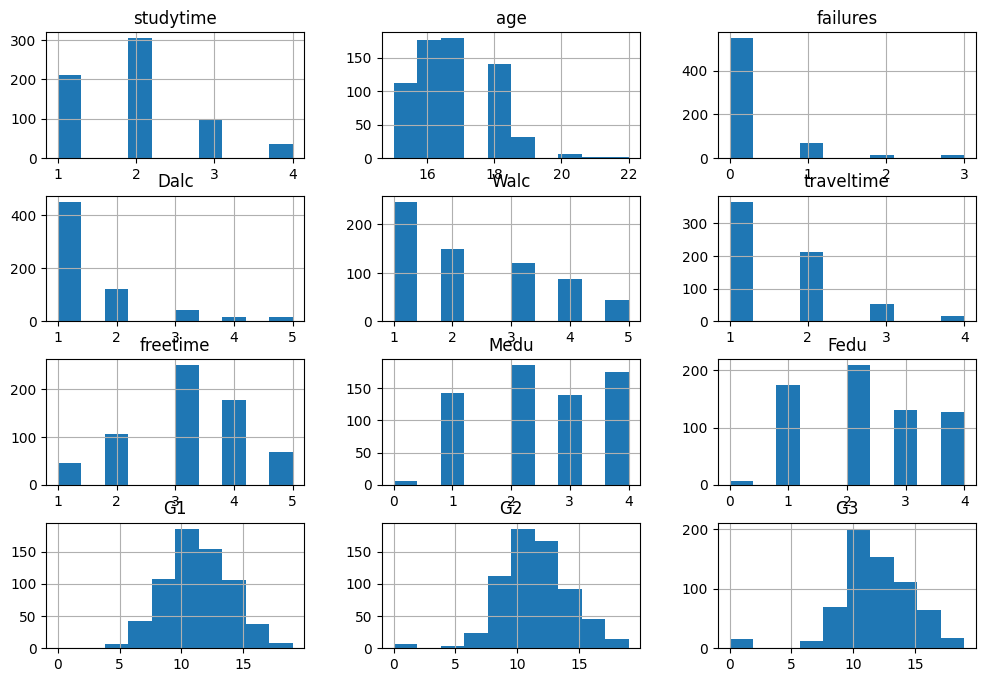

In [31]:
# features = ['Medu',  'failures', 'G1', 'G2', 'G3']

features = ['studytime', 'age', 'failures', 'Dalc', 'Walc', 'traveltime', 'freetime',  'Medu', 'Fedu', 
                   'sex', 'school', 'address', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
                   'higher', 'internet', 'G1', 'G2', 'G3']

df_reduced = df[features].copy()
# df_reduced = df.copy()
df_reduced.hist(figsize=(12, 8))

# corr_matrix = df.corr()
# corr_matrix['G3'].sort_values(ascending=False)

# plt.figure(figsize=(16, 8))
# sns.heatmap(corr_matrix, annot=True)

# df_reduced.drop(['G1', 'G2'], axis=1, inplace=True)

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

features_cat = ['sex', 'school', 'address', 'Mjob', 'Fjob',
                'reason', 'schoolsup', 'guardian', 'higher', 'internet']
# features_cat = ['']

df_reduced_cat = pd.get_dummies(df_reduced, columns=features_cat)

# df_reduced_cat = df_reduced.copy()

X = np.array(df_reduced_cat.drop(['G3'], axis=1))
y = np.array(df_reduced_cat['G3'])

scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X_train, y_train)

print('Score:', sgd_reg.score(X_test, y_test))




# corr_matrix = df_reduced_cat.corr()
# corr_matrix['G3'].sort_values(ascending=False)

# plt.figure(figsize=(10, 8))
# ax = sns.heatmap(df_reduced_cat.corr()[['G3']].sort_values(by='G3', ascending=False), annot=True, cmap='coolwarm')


Score: 0.8871892959469975


C:\Users\matei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Scores: [1.10349135 0.88209155 0.94588871 1.95503044 1.38409968 1.6835241
 1.44878736 1.56895695 0.8482518  1.31068487]
Mean: 1.3130806808770061
Standard deviation: 0.3491190878589116


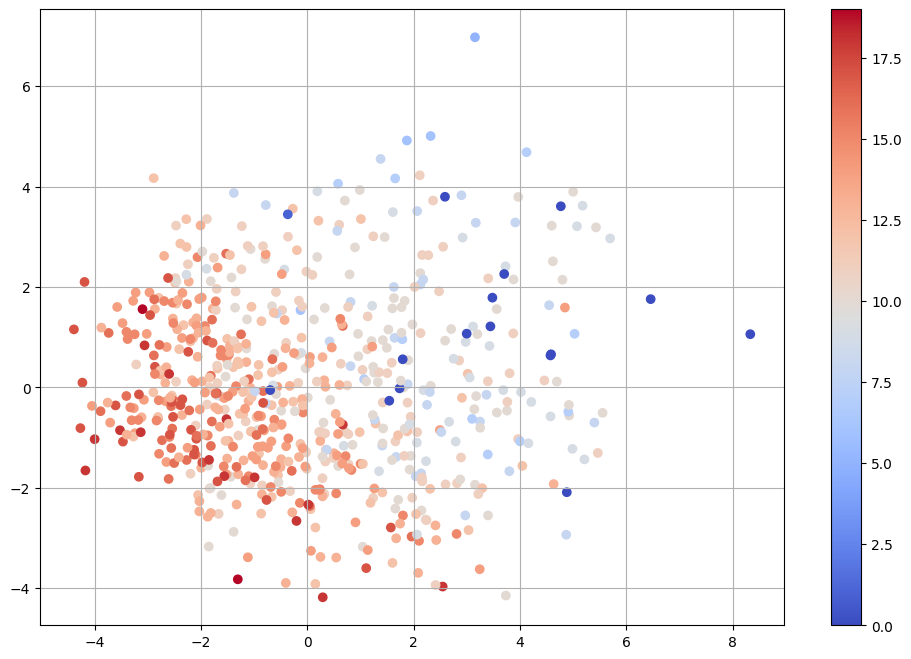

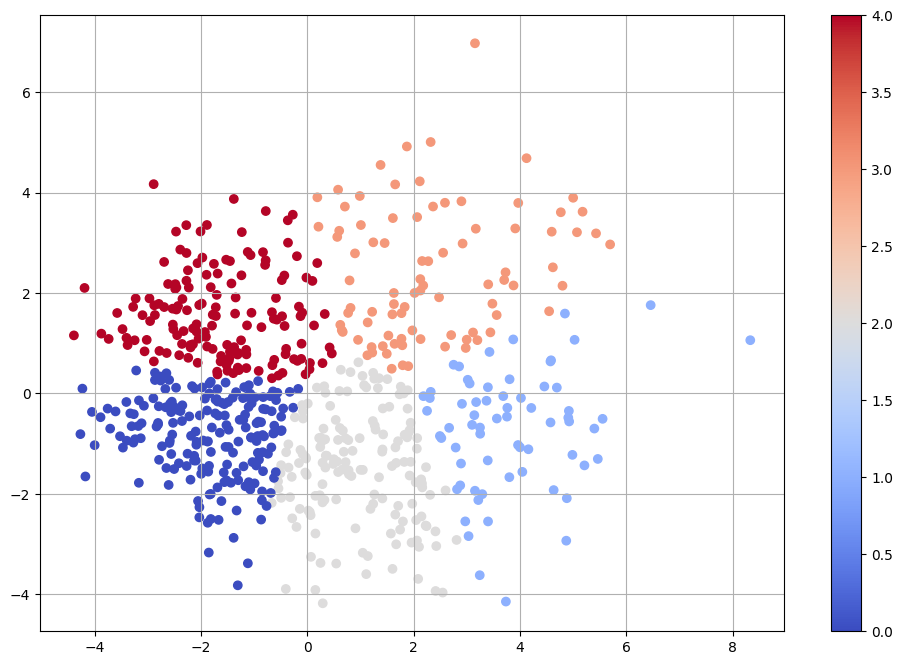

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(12, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='coolwarm')
plt.grid()
plt.colorbar()


kmeans = KMeans(n_clusters=5)
kmeans.fit(X_reduced)
y_kmeans = kmeans.predict(X_reduced)

plt.figure(figsize=(12, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_kmeans, cmap='coolwarm')
plt.grid()
plt.colorbar()


param_grid = [
    {'penalty': ['l1', 'l2'], 'alpha': [
        0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
]

sgd_reg = SGDRegressor()

grid_search = GridSearchCV(sgd_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_

grid_search.best_estimator_


y_pred = grid_search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse


scores = cross_val_score(grid_search.best_estimator_, X_train,
                         y_train, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)


def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())


display_scores(rmse_scores)
